In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

plt.style.use(['science', 'no-latex', 'ieee'])
matplotlib.rcParams.update({'font.size': 9})
plt.rcParams['font.serif'] = 'Times New Roman'
dpi=150

### Plot of different elements in the impedance model

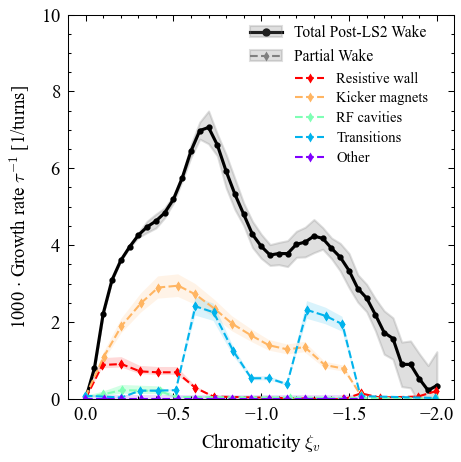

In [215]:

#pyheadtail data: slope error QPH QPV 
dfHT = pd.read_csv('SPS-Headtail-Growth-Rates/2023/q26_qpv_N2.8e10_qph0.2/qpvscan_2022wake.csv', sep=' ').sort_values(by='QPV') 
x0 = dfHT['QPV']
y_total = dfHT['slope']*1e3
errors = dfHT['error']*1e3*10

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/00_total_wake.csv", skiprows=1, delimiter=',')
#x0, y_total = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/01_kickers_wake.csv", skiprows=1, delimiter=',')
x1, y_kickers = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/02_reswall_wake.csv", skiprows=1, delimiter=',')
x2, y_reswall = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/03_transitions_wake.csv", skiprows=1, delimiter=',')
x3, y_transitions = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/04_RFcavities.csv", skiprows=1, delimiter=',')
x4, y_RF = d[:,0], d[:,1]

x_null, y_null = x1, y_kickers*0

figsize = (3.25, 3.25)
fig, ax = plt.subplots(figsize=figsize, dpi=dpi, tight_layout=True)
ax.set_prop_cycle("color", plt.cm.rainbow_r(np.linspace(0,1,5)))

ax.set_xlabel(r"Chromaticity $\xi_v$")
ax.set_ylabel(r'1000 $\cdot$ Growth rate $\tau^{-1}$ [1/turns]')
ax.set_xlim(0.1, -2.1)
ax.set_ylim(0, 10.)

#l1, = ax.plot(qpvvals, grvals, '-k', marker='d', ms=1.5, lw=0.8, label='pyHT q26 non-linear')
#fb = ax.fill_between(qpvvals, grvals-errors, grvals+errors, color='k', alpha=0.15)

l0 = ax.plot(x0, y_total, c='k', ls='-', lw=1.5, marker='o', ms=2)
fb = ax.fill_between(x0, y_total-errors, y_total+errors, color='grey', alpha=0.25)
l1 = ax.plot(x2, y_reswall, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x2, y_reswall*0.9, y_reswall*1.2, alpha=0.15)
l2 = ax.plot(x1, y_kickers, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x1, y_kickers*0.9, y_kickers*1.1, alpha=0.15)
l3 = ax.plot(x4, y_RF, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x4, y_RF*0.6, y_RF*1.6, alpha=0.35)
l4 = ax.plot(x3, y_transitions, ls='--', marker='d', lw=1,ms=2)
ax.fill_between(x3, y_transitions*0.9, y_transitions*1.1, alpha=0.15)
l5 = ax.plot(x_null, y_null, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x_null, 0, 0.1, alpha=0.15)

from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D

l0 = Line2D([0], [0], c='k', lw=1.5, marker='o', ms=3)
lx = Line2D([0], [0], c='grey', lw=1, ls='--', marker='d', ms=2)

ax.legend(handles=[(l0, fb), (lx,fb),], 
           labels=['Total Post-LS2 Wake', 'Partial Wake',],  
           fontsize=7.5, ncol=1, bbox_to_anchor=(0.7, 0.92), loc='center',
           handler_map={l0:HandlerLine2D(marker_pad = 0)} 
           )

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, [l1[0], l2[0], l3[0], l4[0], l5[0]], 
             [ 'Resistive wall', 'Kicker magnets', 'RF cavities','Transitions', 'Other'],
             fontsize=7, ncol=1, bbox_to_anchor=(0.76, 0.73), loc='center',
             labelspacing=0.4)
ax.add_artist(leg)

### Plot historic of measurements

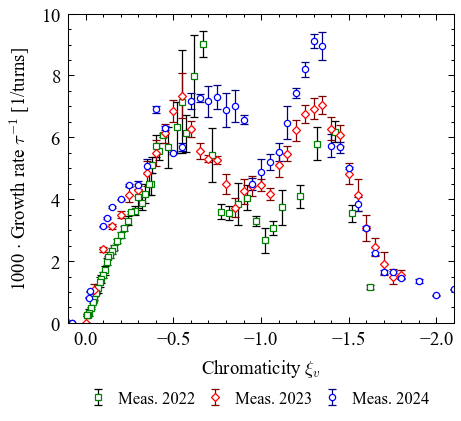

In [ ]:
# measurement data
figsize = (3.25, 2.75)
fig, ax = plt.subplots(figsize=figsize, dpi=dpi, tight_layout=True)
ax.set_prop_cycle("color", plt.cm.rainbow_r(np.linspace(0,1,5)))

ax.set_xlabel(r"Chromaticity $\xi_v$")
ax.set_ylabel(r'1000 $\cdot$ Growth rate $\tau^{-1}$ [1/turns]')
ax.set_xlim(0.1, -2.1)
ax.set_ylim(0, 10.)

# 2022
df = pd.read_csv('SPS-Headtail-Growth-Rates/2022/csv/gr-20220823.csv', sep=' ').sort_values(by='QPV')
qpvs=np.unique(df['QPV'])
for qpv in qpvs:
    mean = df.loc[df['QPV'] == qpv, 'slope'].mean()*1e3
    error = (df.loc[df['QPV'] == qpv, 'slope']*1e3).std(ddof=0)
    markers, caps, bars = ax.errorbar(qpv-0.12, mean, yerr=error, c='g', mfc='w', ms=3., fmt = 's', ecolor='k', elinewidth=0.6, capsize=2, markeredgewidth=0.6)
m1 = ax.errorbar(qpv-0.12, mean, yerr=error, c='g', mfc='w', fmt = 's', ecolor='k',  ms=3., elinewidth=0.6, capsize=2, markeredgewidth=0.6, label='meas. 30/08/22')

# 2023
df = pd.read_csv('SPS-Headtail-Growth-Rates/2023/meas/offline_MD_04072023_d1000_V.csv', sep=' ').sort_values(by='qpv')
qpvs=np.unique(df['qpv'])
for qpv in qpvs:
    mean = df.loc[df['qpv'] == qpv, 'slope'].mean()*1e3*3/2.5
    error = (df.loc[df['qpv'] == qpv, 'slope']*1e3).std(ddof=0)
    markers, caps, bars = ax.errorbar(qpv, mean, yerr=error, c='r', mfc='w',  ms=3., fmt = 'D', ecolor='maroon', elinewidth=0.6, markeredgewidth=0.6, capsize=2)
m2 = ax.errorbar(qpv, mean, yerr=error, c='r', mfc='w', fmt = 'D', ecolor='maroon',  ms=3., elinewidth=0.6, markeredgewidth=0.6, capsize=2, label='meas. 04/07/23')

# 2024
df = pd.read_csv('SPS-Headtail-Growth-Rates/2024/csvs/q26_15072024_d1000_V_3e10.csv', sep=' ').sort_values(by='qpv')
qpvs=np.unique(df['qpv'])
for qpv in qpvs:
    mean = df.loc[df['qpv'] == qpv, 'slope'].mean()*1e3*2
    error = (df.loc[df['qpv'] == qpv, 'slope']*1e3).std(ddof=0)
    markers, caps, bars = ax.errorbar(qpv-0.1, mean, yerr=error, c='b', mfc='w', fmt = 'o',  ms=3., ecolor='navy', elinewidth=0.6, markeredgewidth=0.6, capsize=2)
m3 = ax.errorbar(qpv-0.1, mean, yerr=error, c='b', mfc='w', fmt = 'o', ecolor='navy',  ms=3., elinewidth=0.6, markeredgewidth=0.6, capsize=2, label='meas. 03/07/23')

fig.tight_layout(rect=[0, 0., 1, 1])
fig.legend(handles=[m1, m2, m3], 
           labels=['Meas. 2022', 'Meas. 2023', 'Meas. 2024'],  
           bbox_to_anchor=(0.55, 0.0), fontsize=8, loc='center', 
           ncol=3, columnspacing=0.2, handletextpad=0.2,
            )

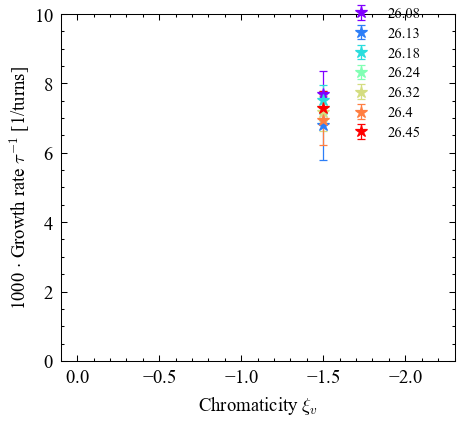

In [47]:
#pyheadtail data: slope error QPH QPV 
df = pd.read_csv('SPS-Headtail-Growth-Rates/2024/csvs/q26_26072024_d1000_V_3e10_tune_cicle2_v2.csv', sep=' ').sort_values(by='qv') 
x_tunes = -1.5

y_grouped = df.groupby("qv")
y_slope = dict(y_grouped["slope"].mean())
y_err = dict(y_grouped["slope"].std())

figsize = (3.25, 3.)
fig, ax = plt.subplots(figsize=figsize, dpi=dpi, tight_layout=True)
ax.set_prop_cycle("color", plt.cm.rainbow(np.linspace(0,1,len(y_slope))))

ax.set_xlabel(r"Chromaticity $\xi_v$")
ax.set_ylabel(r'1000 $\cdot$ Growth rate $\tau^{-1}$ [1/turns]', labelpad=0.5)
ax.set_xlim(0.1, -2.3)
ax.set_ylim(0, 10.)

m, qvs = [], []
for qv in sorted(y_slope.keys()):
    m.append(ax.errorbar(x_tunes, y_slope[qv]*1000, yerr=y_err[qv]*1000, fmt = '*',  ms=6., elinewidth=0.6, markeredgewidth=0.6, capsize=2))
    qvs.append(qv)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, m, 
             qvs,
             fontsize=7, ncol=1, bbox_to_anchor=(0.82, 0.83), loc='center',
             labelspacing=0.4)
ax.add_artist(leg)


### Plot measurements and simulation

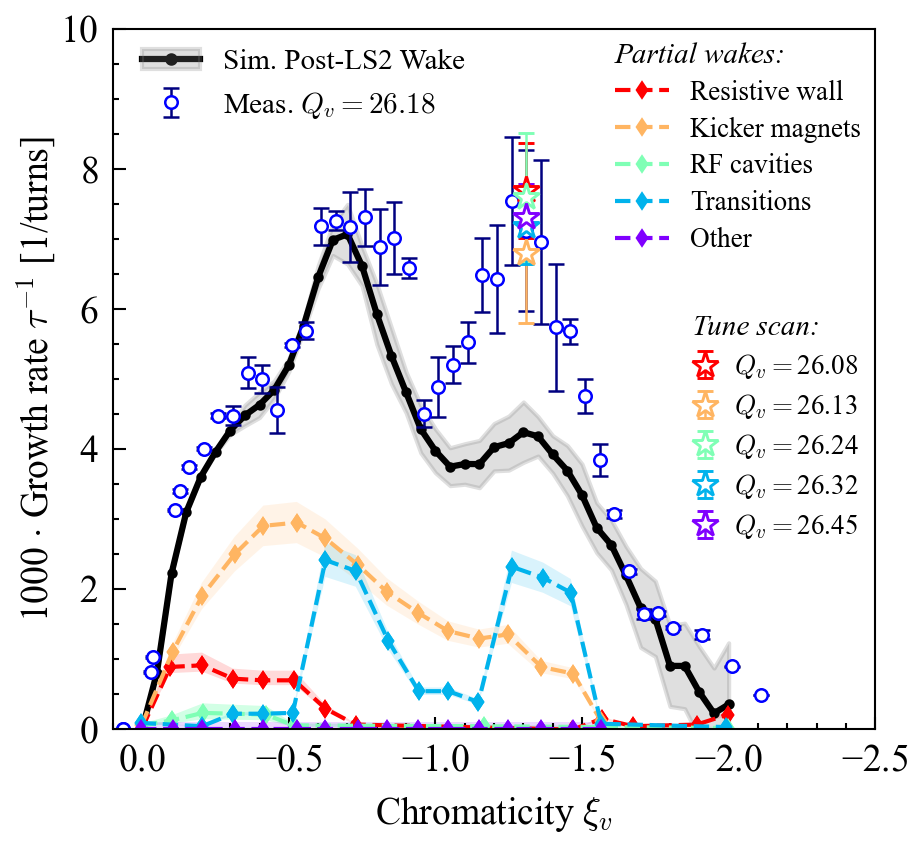

In [31]:
figsize = (3.25, 3.)
fig, ax = plt.subplots(figsize=figsize, dpi=300, tight_layout=True)
ax.set_prop_cycle("color", plt.cm.rainbow_r(np.linspace(0,1,5)))

ax.set_xlabel(r"Chromaticity $\xi_v$")
ax.set_ylabel(r'1000 $\cdot$ Growth rate $\tau^{-1}$ [1/turns]', labelpad=0.5)
ax.set_xlim(0.1, -2.5)
ax.set_ylim(0, 10.)
#ax.minorticks_off()
ax.tick_params(axis='both', top=False, right=False)
ax.tick_params(axis='both', which='minor', top=False, right=False)

#pyheadtail data: slope error QPH QPV 
dfHT = pd.read_csv('SPS-Headtail-Growth-Rates/2023/q26_qpv_N2.8e10_qph0.2/qpvscan_2022wake.csv', sep=' ').sort_values(by='QPV') 
x0 = dfHT['QPV']
y_total = dfHT['slope']*1e3
errors = dfHT['error']*1e3*10

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/00_total_wake.csv", skiprows=1, delimiter=',')
#x0, y_total = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/01_kickers_wake.csv", skiprows=1, delimiter=',')
x1, y_kickers = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/02_reswall_wake.csv", skiprows=1, delimiter=',')
x2, y_reswall = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/03_transitions_wake.csv", skiprows=1, delimiter=',')
x3, y_transitions = d[:,0], d[:,1]

d = np.loadtxt("SPS-Headtail-Growth-Rates/2024/csvs/04_RFcavities.csv", skiprows=1, delimiter=',')
x4, y_RF = d[:,0], d[:,1]

x_null, y_null = x1, y_kickers*0

#l1, = ax.plot(qpvvals, grvals, '-k', marker='d', ms=1.5, lw=0.8, label='pyHT q26 non-linear')
#fb = ax.fill_between(qpvvals, grvals-errors, grvals+errors, color='k', alpha=0.15)

l0 = ax.plot(x0, y_total, c='k', ls='-', lw=1.5, marker='o', ms=1.5)
fb = ax.fill_between(x0, y_total-errors, y_total+errors, color='grey', alpha=0.25)
l1 = ax.plot(x2, y_reswall, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x2, y_reswall*0.9, y_reswall*1.2, alpha=0.15)
l2 = ax.plot(x1, y_kickers, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x1, y_kickers*0.9, y_kickers*1.1, alpha=0.15)
l3 = ax.plot(x4, y_RF, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x4, y_RF*0.6, y_RF*1.6, alpha=0.35)
l4 = ax.plot(x3, y_transitions, ls='--', marker='d', lw=1,ms=2)
ax.fill_between(x3, y_transitions*0.9, y_transitions*1.1, alpha=0.15)
l5 = ax.plot(x_null, y_null, ls='--', marker='d', lw=1, ms=2)
ax.fill_between(x_null, 0, 0.1, alpha=0.15)


# Measurements -------------------------

# measurement data

# 2024
df = pd.read_csv('SPS-Headtail-Growth-Rates/2024/csvs/q26_15072024_d1000_V_3e10_v2.csv', sep=' ').sort_values(by='qpv')

qpvs=np.unique(df['qpv'])
for qpv in qpvs:
    mean = df.loc[df['qpv'] == qpv, 'slope'].mean()*1e3*2
    error = (df.loc[df['qpv'] == qpv, 'slope']*1e3).std(ddof=0)
    markers, caps, bars = ax.errorbar(qpv-0.11, mean, yerr=error, c='b', mfc='w', fmt = 'o',  ms=3., ecolor='navy', elinewidth=0.6, markeredgewidth=0.6, capsize=2)
m3 = ax.errorbar(qpv-0.11, mean, yerr=error, c='b', mfc='w', fmt = 'o', ecolor='navy',  ms=3., elinewidth=0.6, markeredgewidth=0.6, capsize=2, label='meas. 03/07/23')

# Legend -----------------------
title_rc = {'style':'italic', 'size':'7'}
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D

l0 = Line2D([0], [0], c='k', lw=1.5, marker='o', ms=2)
lx = Line2D([0], [0], c='grey', lw=1, ls='--', marker='d', ms=2)

ax.legend(handles=[(l0, fb), m3], 
           labels=['Sim. Post-LS2 Wake', 'Meas. $Q_v=26.18$'],  
           fontsize=7, ncol=1, bbox_to_anchor=(0.25, 0.92), loc='center',
           handler_map={l0:HandlerLine2D(marker_pad = 0)} 
           )


# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, [l1[0], l2[0], l3[0], l4[0], l5[0]], 
             [ 'Resistive wall', 'Kicker magnets', 'RF cavities','Transitions', 'Other'],
             fontsize=6.5, ncol=1, bbox_to_anchor=(0.82, 0.83), loc='center',
             labelspacing=0.4, title='Partial wakes:', title_fontproperties=title_rc, alignment='left')
ax.add_artist(leg)


# Different tune data -----------------------

#pyheadtail data: slope error QPH QPV 
df = pd.read_csv('SPS-Headtail-Growth-Rates/2024/csvs/q26_26072024_d1000_V_3e10_tune_cicle2_v2.csv', sep=' ').sort_values(by='qv') 
x_tunes = -1.31

y_grouped = df.groupby("qv")
y_slope = dict(y_grouped["slope"].mean())
y_err = dict(y_grouped["slope"].std())

ax.set_prop_cycle("color", plt.cm.rainbow_r(np.linspace(0.,1,5)))
m, qvs = [], []
for qv in [26.08, 26.13, 26.24, 26.32, 26.45]:  #sorted(y_slope.keys())[::2]:
    m.append(ax.errorbar(x_tunes, y_slope[qv]*1000, yerr=y_err[qv]*1000, fmt = '*',mfc='w',  ms=6.5, elinewidth=0.6, markeredgewidth=0.7, capsize=2))
    qvs.append("$Q_v=$"+str(qv))

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, m, 
             qvs,
             fontsize=6.5, ncol=1, bbox_to_anchor=(0.86, 0.43), loc='center',
             labelspacing=0.4, handletextpad=0.05,
             title='  Tune scan:', title_fontproperties=title_rc, alignment='left')
ax.add_artist(leg)

fig.savefig('SPS-Headtail-Growth-Rates/2024/plots/figure1_26GeV_tunes.pdf')

### Plot values at different tunes

### Measurement/Sim at different energy

#### Sacherer model

In [5]:
# From ingrid
Q_b = 26.18
impedanceData = np.genfromtxt('SPS-Headtail-Growth-Rates/2024/SPS_Complete_imp_model_PostLS2_Q26.txt', skip_header=1, dtype=complex)
wakeData = np.genfromtxt('SPS-Headtail-Growth-Rates/2024/SPS_complete_wake_model_PostLS2_Q26.txt', skip_header=1)

freqZ = np.real(impedanceData[:, 0]) * 1E9  # frequencies in [GHz] in the file, so I convert it to [Hz]

import iddefix
from scipy.constants import c
freqZ, impedance = iddefix.compute_deconvolution(wakeData[:,0]*1e-9, wakeData[:,2], fmax=5e9, samples=10000, sigma=2.91e-10)
omegaZ = 2*np.pi*freqZ # Angular frequency, omega_0 

# Here I have selected the columns for the vertical plane, change this to compute the tune shift for the horizontal plane.
ReZ_y_dipolar = np.real(impedanceData[:, 2]) # dipolar kick in y-plane, always odd, -f(x) = f(-x)
ImZ_y_dipolar = np.imag(impedanceData[:, 2]) # dipolar kick in the y-plane, always even f(-x) = f(x)

ReZ_y_quad = np.real(impedanceData[:, 4]) 
ImZ_y_quad = np.imag(impedanceData[:, 4])

ReZ_y_dipolar = impedance.real

# For a Gaussian beam
def hmm_gaus(omega, sigma_z, clight, l=0):
    return (omega*sigma_z/clight)**(2*l)*np.exp(-(omega*sigma_z/clight)**2)

l = 0 # azimuthial mode (headtail mode)
clight = c*1e2 #[cm]/[s]
circum = 2 * np.pi * 1.1*1e3*1e2  # [cm]
f_0 = clight / circum  # revolution frequency in Hz
omega_0 = 2 * np.pi * f_0  # angular revolution frequency

# create the spectrum with discrete lines
fmax = 4.9e9 # Hz
num_p = int(fmax/f_0)
sidebands_p = np.arange(-num_p, num_p + 0.5)
omegas = sidebands_p*omega_0 + Q_b*omega_0 # the middle is not zero due to the shift of the betatron tune
gamma_t = 22.8 # gamma transition

omegas_pos = list(filter(lambda x: x >= 0, omegas)) # Positive
omegas_neg = list(filter(lambda x: x < 0, omegas)) # Negative

# ImZ is always even f(x) = f(-x)
'''
ImZ_y_pos_dipolar = ImZ_y_dipolar
ImZ_y_neg_dipolar = ImZ_y_dipolar

ImZ_y_pos_quad = ImZ_y_quad
ImZ_y_neg_quad = ImZ_y_quad

ImZ_pos_interp_y_dipolar = np.interp(omegas_pos, omegaZ, ImZ_y_pos_dipolar)
ImZ_neg_interp_y_dipolar = np.interp(np.abs(omegas_neg), omegaZ, ImZ_y_neg_dipolar)

ImZ_pos_interp_y_quad = np.interp(omegas_pos, omegaZ, ImZ_y_pos_quad)
ImZ_neg_interp_y_quad = np.interp(np.abs(omegas_neg), omegaZ, ImZ_y_neg_quad)

ImZ_interp_total_y_dipolar = list(ImZ_neg_interp_y_dipolar)+list(ImZ_pos_interp_y_dipolar)
ImZ_interp_total_y_quad = list(ImZ_neg_interp_y_quad)+list(ImZ_pos_interp_y_quad)
'''
# ReZ is always odd -f(x) = f(-x)
ReZ_pos_interp_y_dipolar = np.interp(omegas_pos, omegaZ, -ReZ_y_dipolar)
ReZ_neg_interp_y_dipolar = np.interp(np.abs(omegas_neg), omegaZ, ReZ_y_dipolar)

ReZ_pos_interp_y_quad = np.interp(omegas_pos, omegaZ, -ReZ_y_dipolar)
ReZ_neg_interp_y_quad = np.interp(np.abs(omegas_neg), omegaZ, ReZ_y_dipolar)

ReZ_interp_total_y_dipolar = list(ReZ_neg_interp_y_dipolar)+list(ReZ_pos_interp_y_dipolar)
ReZ_interp_total_y_quad = list(ReZ_neg_interp_y_quad)+list(ReZ_pos_interp_y_quad)

# Compute lorentz factor
m0 = 0.9382720813e9 # proton rest mass, [eV/c^2]
E_rest = m0
E_0 = 100e9  # total energy of the reference particle [eV]
gamma = E_0/E_rest
eta = 1 / gamma_t ** 2 - 1 / gamma ** 2 # slip factor
sigma_z = 15 #15.5 # [cm] 
Qp_arr = np.linspace(0, -4, 100) #*Q_b # chromaticity. So it is xi*tune
Zeff = []
for Qp in Qp_arr:
    omega_xi = Qp * Q_b * omega_0 / eta
    hs = hmm_gaus(omegas-omega_xi, sigma_z, clight=clight, l=l)
    # compute effective impedance
    # DIPOLAR
    Zeff_nominator_dipolar = np.sum(ReZ_interp_total_y_dipolar*hs)
    Zeff_denominator_dipolar = np.sum(hs)
    Zeff_dipolar = Zeff_nominator_dipolar/Zeff_denominator_dipolar

    # QUADRUPOLAR
    Zeff_nominator_quad = np.sum(ReZ_interp_total_y_quad*hs)
    Zeff_denominator_quad = np.sum(hs)
    Zeff_quad = Zeff_nominator_quad/Zeff_denominator_quad
    Zeff.append(Zeff_dipolar)#+Zeff_quad)

y_sacherer = np.array(Zeff)
#plt.plot(-Qp_arr, y_sacherer)

In [6]:
# From ingrid
Q_b = 26.18
impedanceData = np.genfromtxt('SPS-Headtail-Growth-Rates/2024/SPS_Complete_imp_model_PostLS2_Q26.txt', skip_header=1, dtype=complex)
wakeData = np.genfromtxt('SPS-Headtail-Growth-Rates/2024/SPS_complete_wake_model_PostLS2_Q26.txt', skip_header=1)

freqZ = np.real(impedanceData[:, 0]) * 1E9  # frequencies in [GHz] in the file, so I convert it to [Hz]

import iddefix
from scipy.constants import c
#freqZ, impedance = iddefix.compute_fft(wakeData[:,0]*1e-9, wakeData[:,2], fmax=5e9, samples=10000)
omegaZ = 2*np.pi*freqZ # Angular frequency, omega_0 

# Here I have selected the columns for the vertical plane, change this to compute the tune shift for the horizontal plane.
ReZ_y_dipolar = np.real(impedanceData[:, 2]) # dipolar kick in y-plane, always odd, -f(x) = f(-x)
ImZ_y_dipolar = np.imag(impedanceData[:, 2]) # dipolar kick in the y-plane, always even f(-x) = f(x)

ReZ_y_quad = np.real(impedanceData[:, 4]) 
ImZ_y_quad = np.imag(impedanceData[:, 4])

#ReZ_y_dipolar = impedance.real

# For a Gaussian beam
def hmm_gaus(omega, sigma_z, clight, l=0):
    return (omega*sigma_z/clight)**(2*l)*np.exp(-(omega*sigma_z/clight)**2)

l = 0 # azimuthial mode (headtail mode)
clight = c*1e2 #[cm]/[s]
circum = 2 * np.pi * 1.1*1e3*1e2  # [cm]
f_0 = clight / circum  # revolution frequency in Hz
omega_0 = 2 * np.pi * f_0  # angular revolution frequency

# create the spectrum with discrete lines
fmax = 4.9e9 # Hz
num_p = int(fmax/f_0)
sidebands_p = np.arange(-num_p, num_p + 0.5)
omegas = sidebands_p*omega_0 + Q_b*omega_0 # the middle is not zero due to the shift of the betatron tune
gamma_t = 22.8 # gamma transition

omegas_pos = list(filter(lambda x: x >= 0, omegas)) # Positive
omegas_neg = list(filter(lambda x: x < 0, omegas)) # Negative

# ImZ is always even f(x) = f(-x)
'''
ImZ_y_pos_dipolar = ImZ_y_dipolar
ImZ_y_neg_dipolar = ImZ_y_dipolar

ImZ_y_pos_quad = ImZ_y_quad
ImZ_y_neg_quad = ImZ_y_quad

ImZ_pos_interp_y_dipolar = np.interp(omegas_pos, omegaZ, ImZ_y_pos_dipolar)
ImZ_neg_interp_y_dipolar = np.interp(np.abs(omegas_neg), omegaZ, ImZ_y_neg_dipolar)

ImZ_pos_interp_y_quad = np.interp(omegas_pos, omegaZ, ImZ_y_pos_quad)
ImZ_neg_interp_y_quad = np.interp(np.abs(omegas_neg), omegaZ, ImZ_y_neg_quad)

ImZ_interp_total_y_dipolar = list(ImZ_neg_interp_y_dipolar)+list(ImZ_pos_interp_y_dipolar)
ImZ_interp_total_y_quad = list(ImZ_neg_interp_y_quad)+list(ImZ_pos_interp_y_quad)
'''
# ReZ is always odd -f(x) = f(-x)
ReZ_pos_interp_y_dipolar = np.interp(omegas_pos, omegaZ, -ReZ_y_dipolar)
ReZ_neg_interp_y_dipolar = np.interp(np.abs(omegas_neg), omegaZ, ReZ_y_dipolar)

ReZ_pos_interp_y_quad = np.interp(omegas_pos, omegaZ, -ReZ_y_dipolar)
ReZ_neg_interp_y_quad = np.interp(np.abs(omegas_neg), omegaZ, ReZ_y_dipolar)

ReZ_interp_total_y_dipolar = list(ReZ_neg_interp_y_dipolar)+list(ReZ_pos_interp_y_dipolar)
ReZ_interp_total_y_quad = list(ReZ_neg_interp_y_quad)+list(ReZ_pos_interp_y_quad)

# Compute lorentz factor
m0 = 0.9382720813e9 # proton rest mass, [eV/c^2]
E_rest = m0
E_0 = 100e9  # total energy of the reference particle [eV]
gamma = E_0/E_rest
eta = 1 / gamma_t ** 2 - 1 / gamma ** 2 # slip factor
sigma_z = 23 #15.5 # [cm] 
Qp_arr2 = np.linspace(0, -5, 100) #*Q_b # chromaticity. So it is xi*tune
Zeff = []
for Qp in Qp_arr2:
    omega_xi = Qp * Q_b * omega_0 / eta
    hs = hmm_gaus(omegas-omega_xi, sigma_z, clight=clight, l=l)
    # compute effective impedance
    # DIPOLAR
    Zeff_nominator_dipolar = np.sum(ReZ_interp_total_y_dipolar*hs)
    Zeff_denominator_dipolar = np.sum(hs)
    Zeff_dipolar = Zeff_nominator_dipolar/Zeff_denominator_dipolar

    # QUADRUPOLAR
    Zeff_nominator_quad = np.sum(ReZ_interp_total_y_quad*hs)
    Zeff_denominator_quad = np.sum(hs)
    Zeff_quad = Zeff_nominator_quad/Zeff_denominator_quad
    Zeff.append(Zeff_dipolar)#+Zeff_quad)

y_fft = np.array(Zeff)
#plt.plot(-Qp_arr2, y_fft)

#### Plot

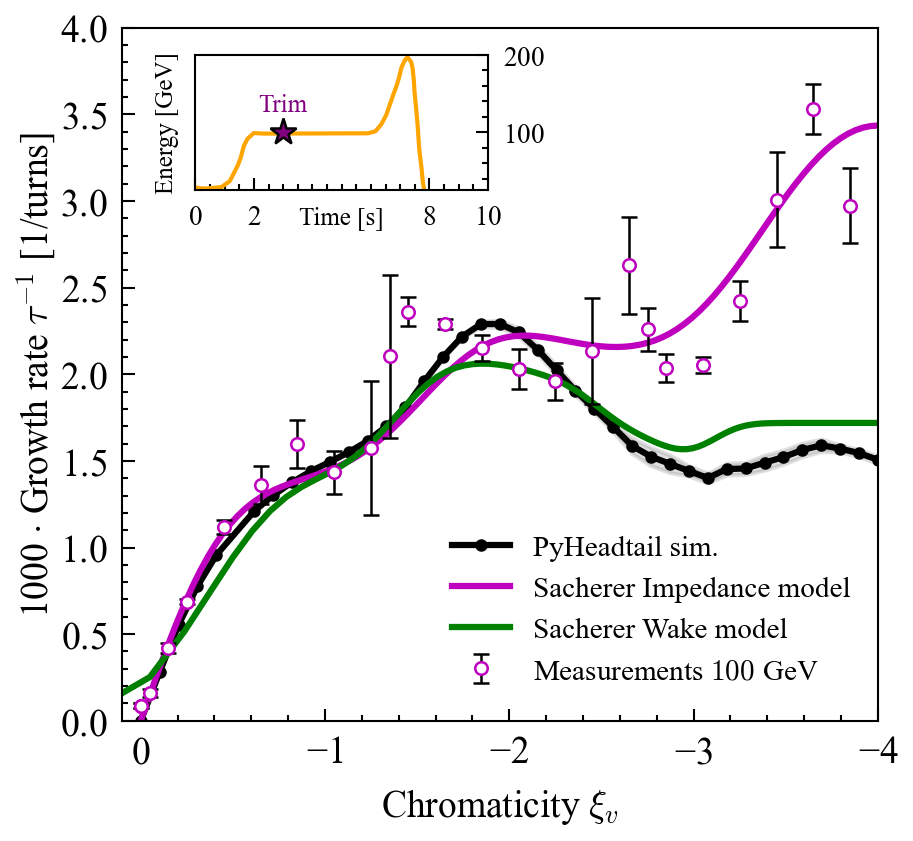

In [15]:
figsize = (3.25, 3.)
fig, ax = plt.subplots(figsize=figsize, dpi=300)
ax.set_prop_cycle("color", plt.cm.rainbow_r(np.linspace(0,1,5)))

ax.set_xlabel(r"Chromaticity $\xi_v$")
ax.set_ylabel(r'1000 $\cdot$ Growth rate $\tau^{-1}$ [1/turns]', labelpad=0.5)
ax.set_xlim(0.1, -4)
ax.set_ylim(0, 4.)
ax.tick_params(axis='both', top=False, right=False)
ax.tick_params(axis='both', which='minor', top=False, right=False)

#pyheadtail data: slope error QPH QPV 
dfHT = pd.read_csv('SPS-Headtail-Growth-Rates/2024/csvs/100GeV_long.csv', sep=' ').sort_values(by='qpv') 
x0 = dfHT['qpv']
y_total = dfHT['slope']*1e3
errors = dfHT['error']*1e3*10

l0 = ax.plot(x0, y_total, c='k', ls='-', lw=1.5, marker='o', ms=2)
fb = ax.fill_between(x0, y_total-errors, y_total+errors, color='grey', alpha=0.25)

#l1 = ax.plot(-np.power(-Qp_arr, 0.6)*2+0.3, y_sacherer/y_sacherer.max()*y_total.max(), c='b', ls='-', lw=1.5, ms=2.5)
l1 = ax.plot(Qp_arr, y_sacherer/y_sacherer.max()*y_total.max()*1.5, c='m', ls='-', lw=1.5,)
l2 = ax.plot(-np.power(-Qp_arr2, 0.5)*2+0.4, y_fft/y_fft.max()*y_total.max()*0.9, c='g', ls='-', lw=1.5,)

#measurement data
df = pd.read_csv('SPS-Headtail-Growth-Rates/2024/csvs/q26_02082024_d1000_V_3e10.csv', sep=' ').sort_values(by='qpv')
qpvs=np.unique(df['qpv'])
for qpv in qpvs:
    mean = df.loc[df['qpv'] == qpv, 'slope'].mean()*1e3
    error = (df.loc[df['qpv'] == qpv, 'slope']*1e3).std(ddof=0)
    markers, caps, bars = ax.errorbar(qpv-0.25, mean, yerr=error, c='m', mfc='w', fmt = 'o',  ms=3., ecolor='k', elinewidth=0.6, markeredgewidth=0.6, capsize=2)
m3 = ax.errorbar(qpv-0.25, mean, yerr=error, c='m', mfc='w', fmt = 'o', ecolor='k',  ms=3., elinewidth=0.6, markeredgewidth=0.6, capsize=2, label='meas. 03/07/23')

# Inset axis with energy
# [left, bottom, width, height] in figure fraction (0–1)
energy = np.loadtxt('SPS-Headtail-Growth-Rates/2024/csvs/energy100GeV.csv', skiprows=1, delimiter=',')
inset_ax = fig.add_axes([0.2, 0.7, 0.3, 0.15])
inset_ax.plot(energy[:, 0]*8, energy[:, 1]*(200-26)+26, color='orange')
inset_ax.errorbar(3, 100, color='purple', fmt = '*',  ms=6.5, mec='k', elinewidth=0.6, markeredgewidth=0.6, capsize=2)
inset_ax.text(2.15, 135, 'Trim', color='purple', fontsize=6., va='center' )
inset_ax.set_xlabel("Time [s]", fontsize=6., labelpad=0.5)
inset_ax.set_ylabel("Energy [GeV]", fontsize=6.)
inset_ax.xaxis.set_label_coords(0.5, -0.12)
inset_ax.set_xticks([0, 2, 8, 10])
inset_ax.set_ylim(26, 200)
inset_ax.set_xlim(0, 10)
inset_ax.tick_params(labelsize=6.5) 
inset_ax.yaxis.tick_right()   
inset_ax.tick_params(axis='both', top=False,)
inset_ax.tick_params(axis='both', which='minor', top=False,)
#inset_ax.minorticks_off()

# Legend
ax.legend(handles=[l0[0], l1[0], l2[0], m3], 
           labels=['PyHeadtail sim.', 'Sacherer Impedance model', 'Sacherer Wake model', r'Measurements $100~$GeV'],  
           fontsize=7, ncol=1, bbox_to_anchor=(0.7, 0.16), loc='center',
           )

fig.savefig('SPS-Headtail-Growth-Rates/2024/plots/figure2_100GeV_Sacherer.pdf')